## Assignment 8A

In [1]:
%pylab inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus as pdy
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")


Populating the interactive namespace from numpy and matplotlib


### 1. Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.

I will be working on Car Evaluation Data Set. There are 1728 instances along with 6 attributes. The 6 attributes are as follows: 
Buying,
Maintenance,
Doors,
Persons,
Lug_Boot,
Safety.
There are also four class values namely: unacc, acc, good and vgood. An interesting thing to notice is that more than 70% of the instances cannot be accepted.

### 2. Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content o the dataset.


There are no missing data in this dataset. There are 4 categorical attributes and 2 numeric attributes. The 4 categorical attributes are Buying, Maintenance, Lug_Boot and Safety. The 2 numeric categories are Doors and Persons.

In [6]:
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
carEve = pd.read_csv(fileURL, names=['Buying','Maintenance','Doors','Persons','Lug_Boot','Safety','Acceptability'], header=None)
car_data = pd.DataFrame(x, columns=['Buying', 'Maintainence', 'Doors', 'Persons', 'Lug_Boots', 'Safety'])

In [5]:
lbEn = preprocessing.LabelEncoder()
prec = carEve.ix[:,0:6].as_matrix()
x = lbEn.fit_transform(prec[0])
for i in prec[1:]:
    x = np.vstack([x, lbEn.fit_transform(i)])

In [7]:
carEve.describe()

Buying Maintenance Doors Persons Lug_Boot Safety Acceptability
count    1728        1728  1728    1728     1728   1728          1728
unique      4           4     4       3        3      3             4
top       med         med     3    more      big    med         unacc
freq      432         432   432     576      576    576          1210

In [8]:
car_data.describe()

Buying  Maintainence        Doors      Persons    Lug_Boots  \
count  1728.000000   1728.000000  1728.000000  1728.000000  1728.000000   
mean      2.791667      2.791667     0.333333     1.277778     2.652778   
std       1.172203      1.172203     0.471541     1.554020     1.126526   
min       1.000000      1.000000     0.000000     0.000000     1.000000   
25%       2.000000      2.000000     0.000000     0.000000     2.000000   
50%       3.000000      3.000000     0.000000     0.500000     3.000000   
75%       4.000000      4.000000     1.000000     3.000000     4.000000   
max       5.000000      5.000000     1.000000     5.000000     5.000000   

            Safety  
count  1728.000000  
mean      2.270833  
std       0.895608  
min       1.000000  
25%       2.000000  
50%       2.000000  
75%       3.000000  
max       5.000000

In [9]:
car_data.head()

Buying  Maintainence  Doors  Persons  Lug_Boots  Safety
0       3             3      0        0          2       1
1       3             3      0        0          2       1
2       3             3      0        0          2       1
3       3             3      0        0          2       1
4       2             2      0        0          1       1

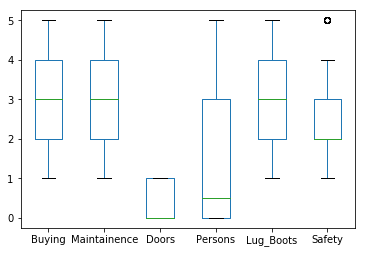

In [10]:
car_data.plot(kind='box')

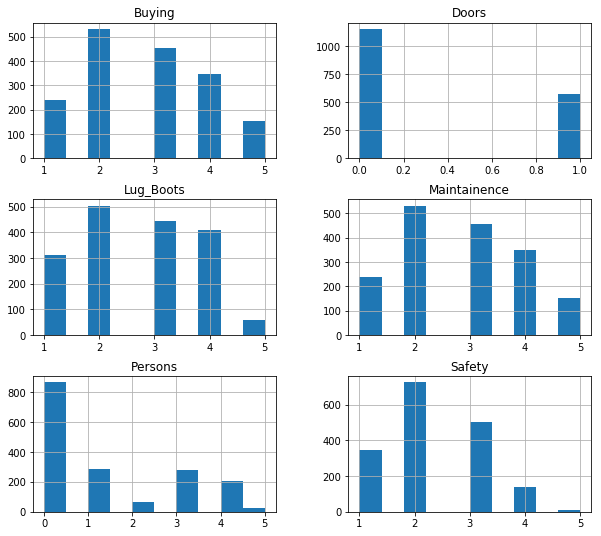

In [11]:
car_data.hist(figsize=(10,9));

### 3. Using scikit-learns DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data.

In [12]:
classfr = tree.DecisionTreeClassifier()
lb = preprocessing.LabelEncoder()
x = car_data[car_data.columns]
y = carEve['Acceptability'].as_matrix()
y = lb.fit_transform(y)
classfr.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 4. The link above explains how you can generate a visual output for the tree you just trained. Use that code snippet to create a visualization of your tree.

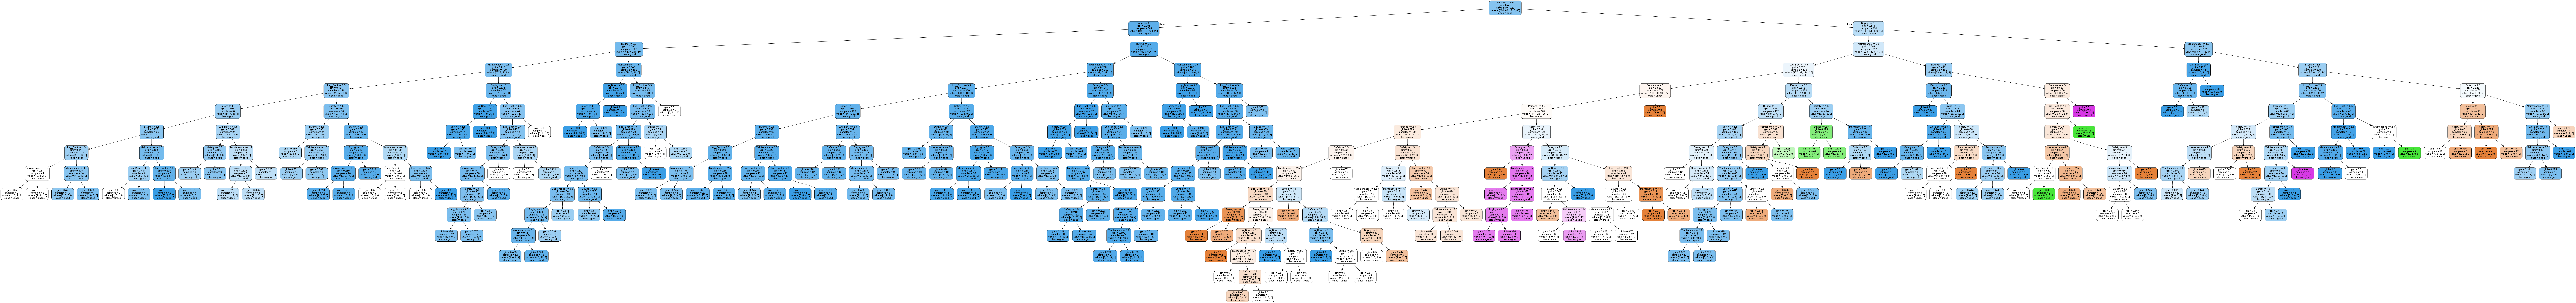

In [13]:
with open("img.dot", "w") as i:
    i = tree.export_graphviz(classfr, out_file=i,
                             feature_names=['Buying', 'Maintenance', 'Doors', 'Persons', 'Lug_Boot', 'Safety'], 
                             class_names=['unacc', 'acc', 'good', 'vgood'], 
                             filled=True, rounded=True)
    
graph = pdy.graph_from_dot_data(open('img.dot').read()) 
Image(graph.create_png())

### 5. Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

In [14]:
new_inst = ["one","two","three","four","five","six"]
x = lbEn.fit_transform(new_inst)
x = x.reshape(1,-1)
print(x)
print(classfr.predict(x))
print(lb.inverse_transform(classfr.predict(x)))

[[2 5 4 1 0 3]]
[2]
['unacc']


As we can see from the tree that there are numerous ways to reach the above conclusion. We cannot expect the attributes to give a complete definition of all factors, but we still can make use of the given 6 attributes. There are many factors that influence the class allocation for each person that is whether a car is unacc, acc, good or vgood to a person. Hence we can make predictions using this model.